In [43]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
#We do not want to see warnings
warnings.filterwarnings("ignore") 

In [44]:
#import data
data = pd.read_csv("uber.csv")

In [45]:
#Create a data copy
df = data.copy()

In [46]:
#Print data
df.head

<bound method NDFrame.head of         Unnamed: 0                            key  fare_amount  \
0         24238194    2015-05-07 19:52:06.0000003          7.5   
1         27835199    2009-07-17 20:04:56.0000002          7.7   
2         44984355   2009-08-24 21:45:00.00000061         12.9   
3         25894730    2009-06-26 08:22:21.0000001          5.3   
4         17610152  2014-08-28 17:47:00.000000188         16.0   
...            ...                            ...          ...   
199995    42598914   2012-10-28 10:49:00.00000053          3.0   
199996    16382965    2014-03-14 01:09:00.0000008          7.5   
199997    27804658   2009-06-29 00:42:00.00000078         30.9   
199998    20259894    2015-05-20 14:56:25.0000004         14.5   
199999    11951496   2010-05-15 04:08:00.00000076         14.1   

                pickup_datetime  pickup_longitude  pickup_latitude  \
0       2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1       2009-07-17 20:04:56 UTC      

In [47]:
#Get Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [48]:
#pickup_datetime is not in required data format
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])

In [49]:
    df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   Unnamed: 0         200000 non-null  int64              
 1   key                200000 non-null  object             
 2   fare_amount        200000 non-null  float64            
 3   pickup_datetime    200000 non-null  datetime64[ns, UTC]
 4   pickup_longitude   200000 non-null  float64            
 5   pickup_latitude    200000 non-null  float64            
 6   dropoff_longitude  199999 non-null  float64            
 7   dropoff_latitude   199999 non-null  float64            
 8   passenger_count    200000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(2), object(1)
memory usage: 13.7+ MB


In [50]:
#Statistics of data
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [51]:
#Number of missing values
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [52]:
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
print(correlation_matrix)

                   Unnamed: 0  fare_amount  pickup_longitude  pickup_latitude  \
Unnamed: 0           1.000000     0.000589          0.000230        -0.000341   
fare_amount          0.000589     1.000000          0.010457        -0.008481   
pickup_longitude     0.000230     0.010457          1.000000        -0.816461   
pickup_latitude     -0.000341    -0.008481         -0.816461         1.000000   
dropoff_longitude    0.000270     0.008986          0.833026        -0.774787   
dropoff_latitude     0.000271    -0.011014         -0.846324         0.702367   
passenger_count      0.002257     0.010150         -0.000414        -0.001560   

                   dropoff_longitude  dropoff_latitude  passenger_count  
Unnamed: 0                  0.000270          0.000271         0.002257  
fare_amount                 0.008986         -0.011014         0.010150  
pickup_longitude            0.833026         -0.846324        -0.000414  
pickup_latitude            -0.774787          0.702367 

In [53]:
df.dropna(subset=['dropoff_longitude', 'dropoff_latitude'], inplace=True)

In [54]:
#Drop the rows with missing values
df.dropna(inplace=True)

In [55]:
correlation_matrix = df.select_dtypes(include=[np.number]).corr()

In [56]:
print(correlation_matrix)

                   Unnamed: 0  fare_amount  pickup_longitude  pickup_latitude  \
Unnamed: 0           1.000000     0.000587          0.000230        -0.000341   
fare_amount          0.000587     1.000000          0.010458        -0.008482   
pickup_longitude     0.000230     0.010458          1.000000        -0.816461   
pickup_latitude     -0.000341    -0.008482         -0.816461         1.000000   
dropoff_longitude    0.000270     0.008986          0.833026        -0.774787   
dropoff_latitude     0.000271    -0.011014         -0.846324         0.702367   
passenger_count      0.002259     0.010158         -0.000415        -0.001559   

                   dropoff_longitude  dropoff_latitude  passenger_count  
Unnamed: 0                  0.000270          0.000271         0.002259  
fare_amount                 0.008986         -0.011014         0.010158  
pickup_longitude            0.833026         -0.846324        -0.000415  
pickup_latitude            -0.774787          0.702367 

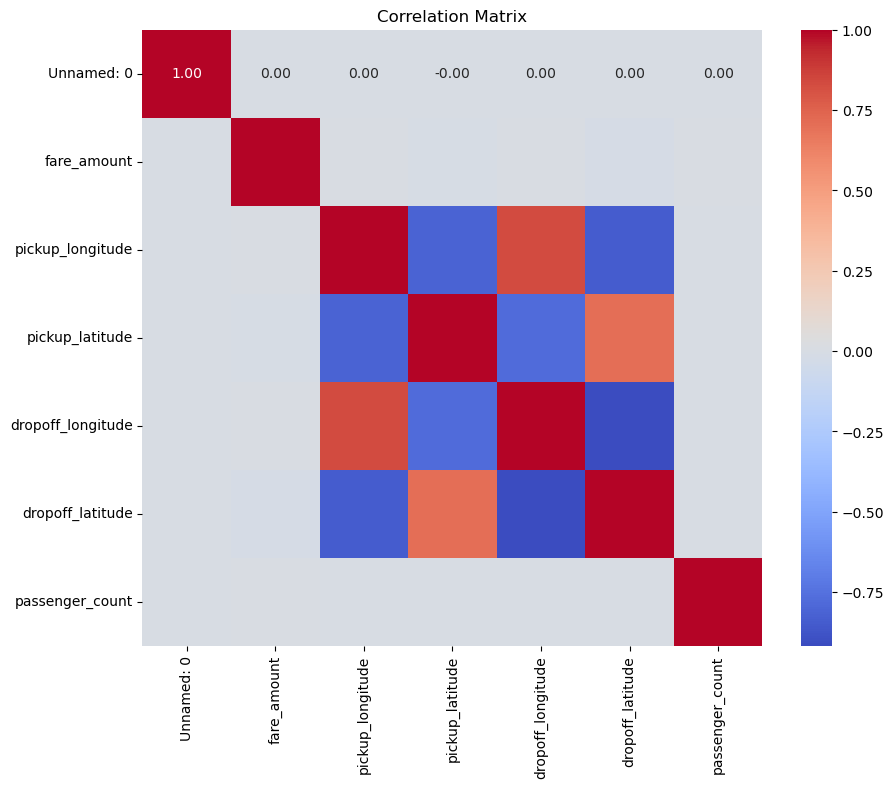

In [57]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1ce668e0810>,
 'caps': [<matplotlib.lines.Line2D at 0x1ce668e1010>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ce668bcb90>],
 'medians': [<matplotlib.lines.Line2D at 0x1ce668e3110>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ce668e3c10>],
 'means': []}

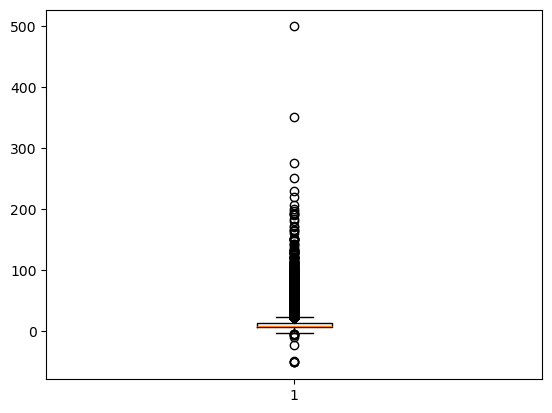

In [58]:
plt.boxplot(df['fare_amount'])

In [59]:
#Remove Outliers
q_low = df["fare_amount"].quantile(0.01)
q_hi  = df["fare_amount"].quantile(0.99)

df = df[(df["fare_amount"] < q_hi) & (df["fare_amount"] > q_low)]

In [60]:
#Check the missing values now
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [61]:
#Time to apply learning models
from sklearn.model_selection import train_test_split

In [62]:
#Take x as predictor variable
x = df.drop("fare_amount", axis = 1)
#And y as target variable
y = df['fare_amount']


In [63]:
#Necessary to apply model
x['pickup_datetime'] = pd.to_numeric(pd.to_datetime(x['pickup_datetime']))
x = x.loc[:, x.columns.str.contains('^Unnamed')]

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
lrmodel = LinearRegression()
lrmodel.fit(x_train, y_train)

LinearRegression()

In [67]:
#Prediction
predict = lrmodel.predict(x_test)

In [68]:
#Check Error
from sklearn.metrics import mean_squared_error
lrmodelrmse = np.sqrt(mean_squared_error(predict, y_test))
print("RMSE error for the model is ", lrmodelrmse)

RMSE error for the model is  8.063863046328835


In [69]:
#Let's Apply Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rfrmodel = RandomForestRegressor(n_estimators = 100, random_state = 101)

In [70]:
#Fit the Forest
rfrmodel.fit(x_train, y_train)
rfrmodel_pred = rfrmodel.predict(x_test)

In [71]:
#Errors for the forest
rfrmodel_rmse = np.sqrt(mean_squared_error(rfrmodel_pred, y_test))
print("RMSE value for Random Forest is:",rfrmodel_rmse)

RMSE value for Random Forest is: 9.757713738069647
